Data Overview:
                                            question  \
0  What are the top 3 most frequent teams in this...   
1  Count the frequency of each season in the data...   
2  Count the number of players who have scored mo...   
3  Identify the player with the highest number of...   
4  Calculate the average seasonal rating across a...   

                                        ground_truth  \
0       Man City: 99, Real Madrid: 77, Barcelona: 73   
1  {'2022/2023': 166, '2023/2024': 165, '2021/202...   
2                                         Count: 340   
3                               Player: Lionel Messi   
4                               Average Rating: 7.11   

                                  derivation difficulty  \
0                 df['Teams'].value_counts()       easy   
1               df['Seasons'].value_counts()       easy   
2                  len(df[df['Goals'] > 10])     medium   
3  df.loc[df['Assists'].idxmax(), 'Players']       easy   
4               

/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

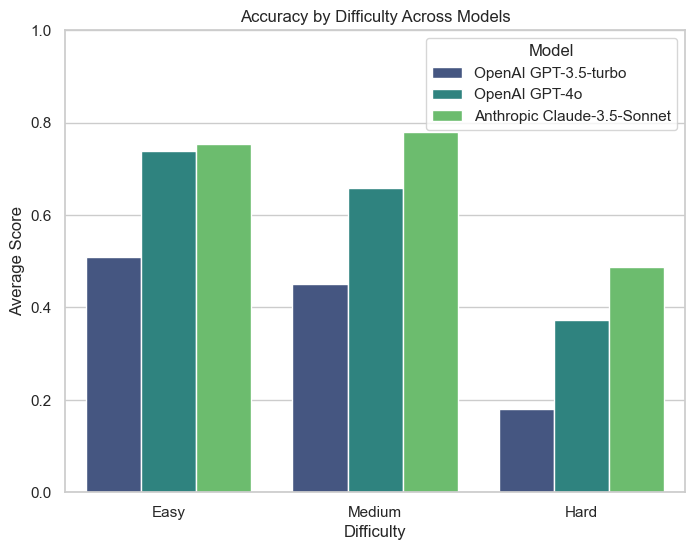

/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

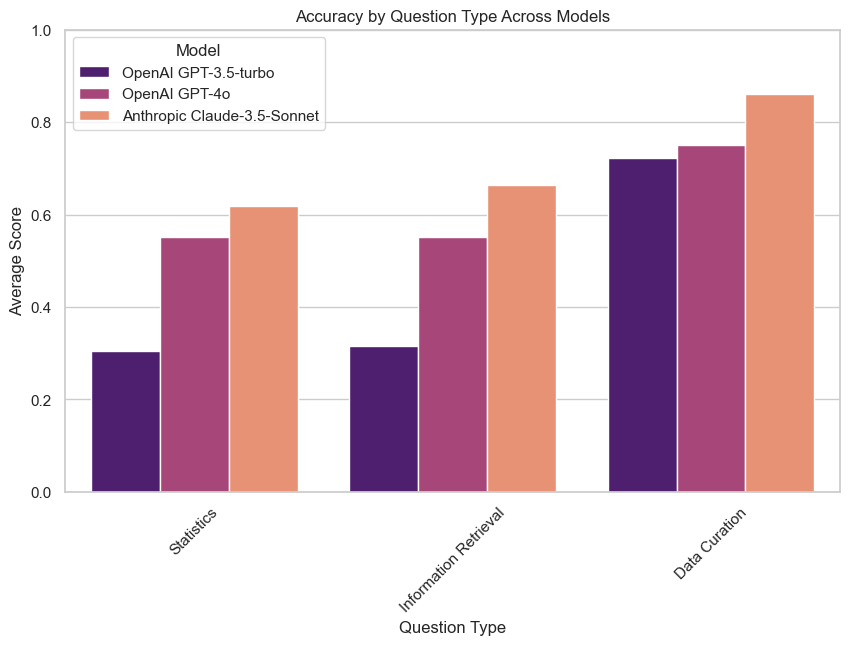

/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

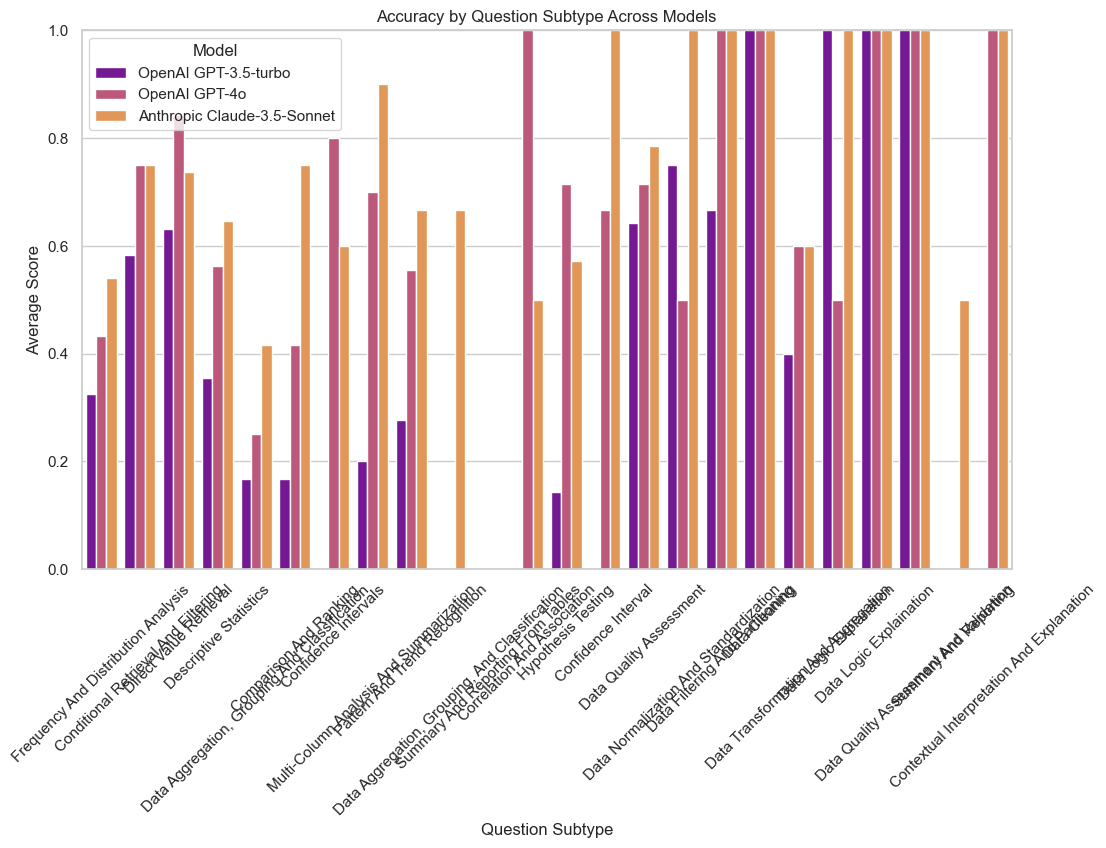

/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raywan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

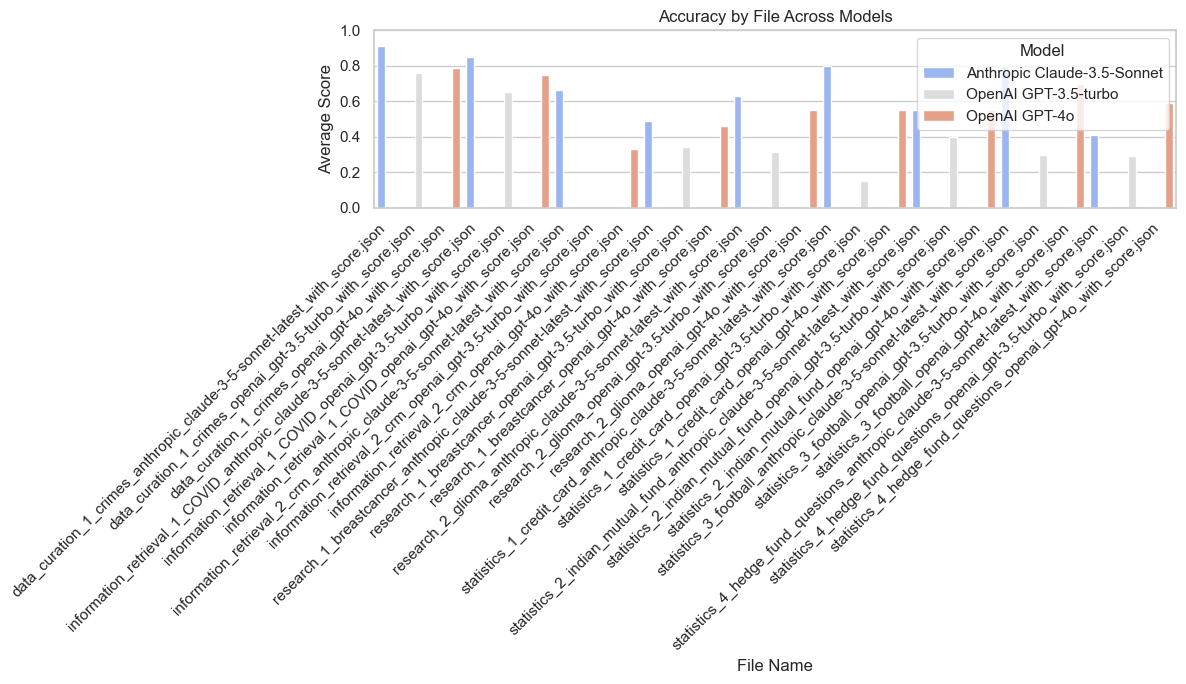


Summary Table:
                           model difficulty                   type  \
0    Anthropic Claude-3.5-Sonnet       easy          data curation   
1    Anthropic Claude-3.5-Sonnet       easy          data curation   
2    Anthropic Claude-3.5-Sonnet       easy          data curation   
3    Anthropic Claude-3.5-Sonnet       easy          data curation   
4    Anthropic Claude-3.5-Sonnet       easy  information retrieval   
..                           ...        ...                    ...   
166                OpenAI GPT-4o     medium             statistics   
167                OpenAI GPT-4o     medium             statistics   
168                OpenAI GPT-4o     medium             statistics   
169                OpenAI GPT-4o     medium             statistics   
170                OpenAI GPT-4o     medium             statistics   

                                           subtype     score  
0                  data filtering and partitioning  1.000000  
1                

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

def load_json_files_with_label(folder_path, model_name):
    combined_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            with open(os.path.join(folder_path, file_name), 'r') as f:
                data = json.load(f)
                for entry in data:
                    entry['model'] = model_name  # Add model name
                    entry['file_name'] = file_name  # Add file name
                combined_data.extend(data)
    return combined_data


# Function to create DataFrame from combined JSON data
def create_dataframe(data):
    df = pd.DataFrame(data)
    df['subtype'] = df['subtype'].str.lower()
    df['type'] = df['type'].str.lower()
    df['difficulty'] = df['difficulty'].str.lower()
    return df

# Paths to folders for each model
model_paths = {
    'OpenAI GPT-3.5-turbo': './results_folder/gpt-3.5-turbo-scores',
    'OpenAI GPT-4o': './results_folder/gpt-4o-scores',
    'Anthropic Claude-3.5-Sonnet': './results_folder/claude-3.5-scores',
}

# Load data for all models
combined_data = []
for model_name, folder_path in model_paths.items():
    combined_data.extend(load_json_files_with_label(folder_path, model_name))

df = create_dataframe(combined_data)

print("Data Overview:")
print(df.head())

# Overall Accuracy for each model
overall_accuracy = df.groupby('model')['score'].mean() * 100
print("\nOverall Accuracy by Model:")
print(overall_accuracy)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='difficulty', y='score', hue='model', data=df, ci=None, palette='viridis')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()])  # Title case for x-axis labels
plt.title('Accuracy by Difficulty Across Models')
plt.ylabel('Average Score')
plt.xlabel('Difficulty')
plt.legend(title='Model')
plt.show()

# 2. Plot Accuracy by Question Type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='type', y='score', hue='model', data=df, ci=None, palette='magma')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()], rotation=45)  # Title case and rotate x-axis labels
plt.title('Accuracy by Question Type Across Models')
plt.ylabel('Average Score')
plt.xlabel('Question Type')
plt.legend(title='Model')
plt.show()

# 3. Plot Accuracy by Question Subtype
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='subtype', y='score', hue='model', data=df, ci=None, palette='plasma')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()], rotation=45)  # Title case and rotate x-axis labels
plt.title('Accuracy by Question Subtype Across Models')
plt.ylabel('Average Score')
plt.xlabel('Question Subtype')
plt.legend(title='Model')
plt.show()

file_accuracy = df.groupby(['file_name', 'model'])['score'].mean().reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='file_name', y='score', hue='model', data=file_accuracy, ci=None, palette='coolwarm')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Accuracy by File Across Models')
plt.ylabel('Average Score')
plt.xlabel('File Name')
plt.legend(title='Model')
plt.tight_layout()  # Ensure everything fits well
plt.show()


summary_table = df.groupby(['model', 'difficulty', 'type', 'subtype'])['score'].mean().reset_index()
print("\nSummary Table:")
print(summary_table)

